# Customer Segmentation using Clustering

This notebook performs customer segmentation using clustering techniques on customer profiles and transaction data.

c:\Users\KISHOR\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\KISHOR\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\KISHOR\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\KISHOR\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds

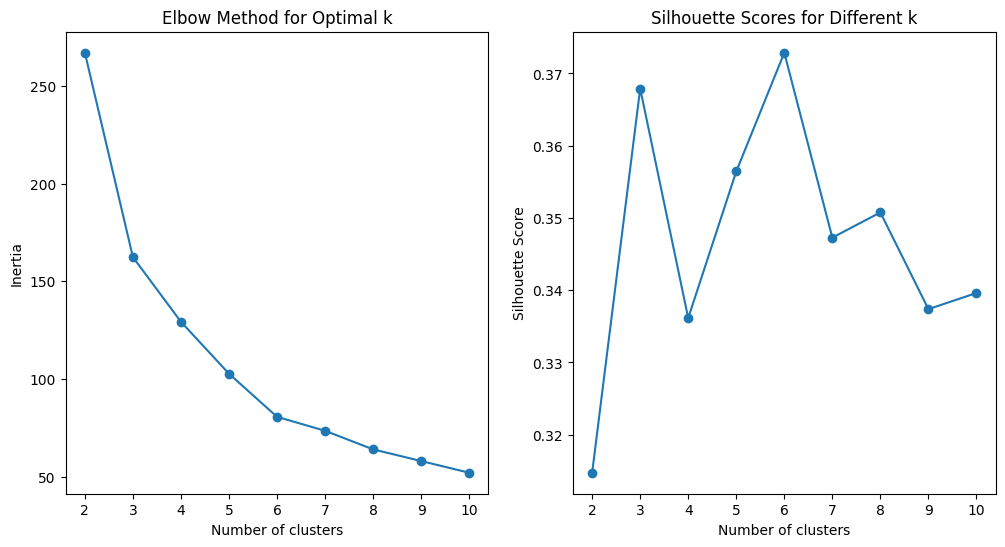

Davies-Bouldin Index: 0.8091356937253885


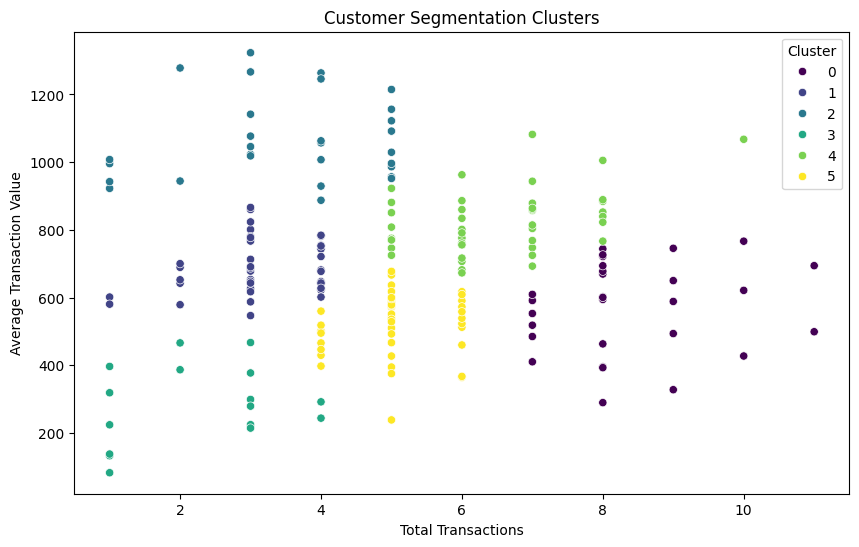

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge datasets to create a customer profile
customer_transactions = transactions.merge(customers, on='CustomerID')

# Create a feature set for clustering
customer_features = customer_transactions.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'TotalValue': 'mean'
}).reset_index()
customer_features.rename(columns={'TransactionID': 'TotalTransactions', 'TotalValue': 'AverageTransactionValue'}, inplace=True)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['TotalTransactions', 'AverageTransactionValue']])

# Determine the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

# Plot the elbow method results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Fit the KMeans model with the optimal number of clusters (to be determined)
optimal_k = 4  # Example optimal k, adjust based on elbow method results
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

# Calculate DB Index
db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalTransactions', y='AverageTransactionValue', hue='Cluster', data=customer_features, palette='viridis')
plt.title('Customer Segmentation Clusters')
plt.xlabel('Total Transactions')
plt.ylabel('Average Transaction Value')
plt.legend(title='Cluster')
plt.show()